HEART DISEASE CLASSIFICATION USING RANDOM FOREST CLASSIFIER

IMPORTING LIBRARIES

In [12]:
#regular data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#models from scikit-learn
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score

IMPORTING DATASET

In [13]:
heart_disease=pd.read_csv("/content/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart_disease.shape

(303, 14)

OUR DATASET HAS 303 ROWS AND 14 COLUMNS

In [15]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

OUR DATASET DOESN'T HAVE ANY MISSING VALUES

In [16]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


FINDING PATTERNS

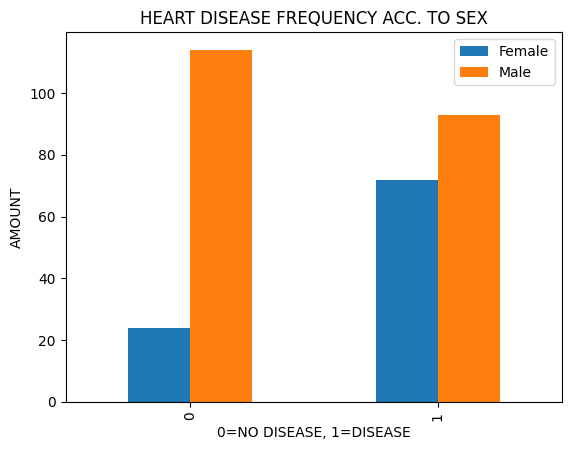

In [17]:
pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar")
plt.title("HEART DISEASE FREQUENCY ACC. TO SEX")
plt.xlabel("0=NO DISEASE, 1=DISEASE")
plt.ylabel("AMOUNT")
plt.legend(["Female","Male"]);

VISUALIZING A CORRELATION MATRIX USING SEABORN

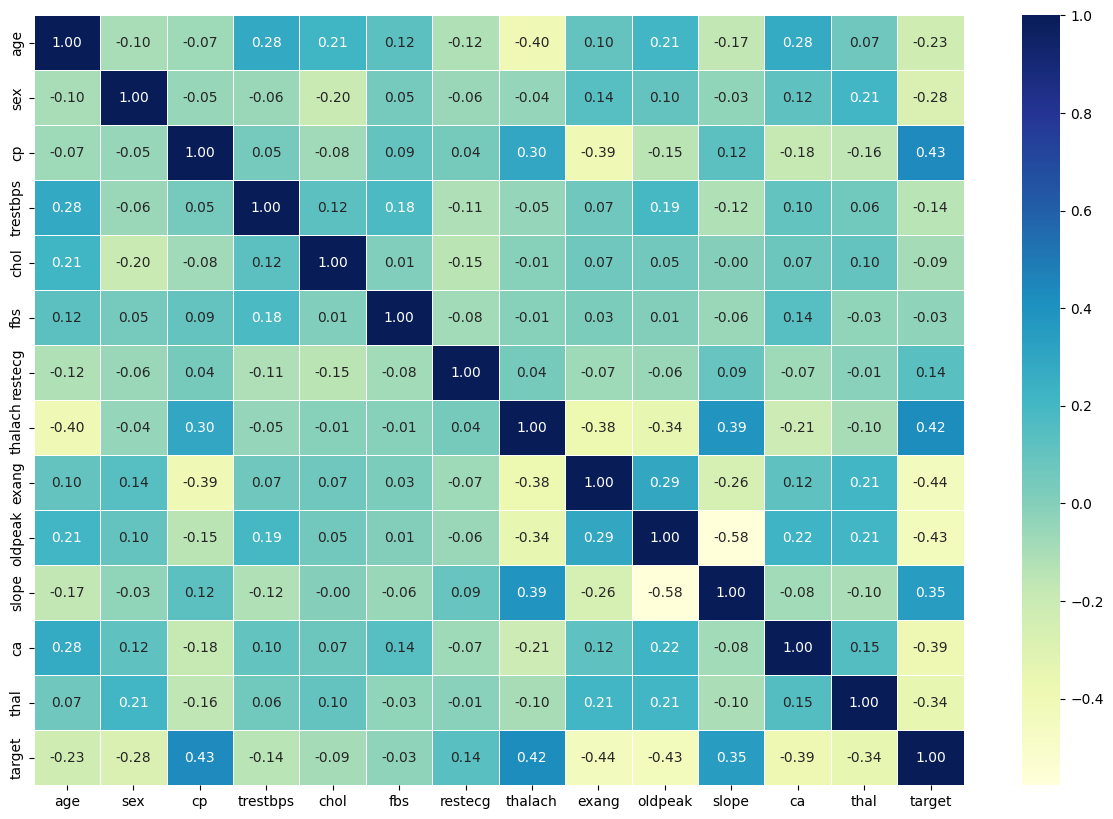

In [18]:
corr_matrix=heart_disease.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidth=0.5,
               fmt=".2f",
               cmap="YlGnBu");

MODELLING DATA

In [19]:
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [21]:
x_train.shape, y_train.shape

((242, 13), (242,))

RANDOM FOREST CLASSIFIER ALGORITHM

In [25]:
for i in range(1,1000,100):
  model=RandomForestClassifier(n_estimators=i)
  model.fit(x_train,y_train)
  print(f"Score of the model when estimator value is equal to {i} is:{model.score(x_test,y_test)*100:.2f}%")

Accuracy of the model when estimator value is equal to 1 is:67.21%
Accuracy of the model when estimator value is equal to 101 is:80.33%
Accuracy of the model when estimator value is equal to 201 is:78.69%
Accuracy of the model when estimator value is equal to 301 is:80.33%
Accuracy of the model when estimator value is equal to 401 is:78.69%
Accuracy of the model when estimator value is equal to 501 is:78.69%
Accuracy of the model when estimator value is equal to 601 is:80.33%
Accuracy of the model when estimator value is equal to 701 is:78.69%
Accuracy of the model when estimator value is equal to 801 is:80.33%
Accuracy of the model when estimator value is equal to 901 is:80.33%


EVALUATING OUR MACHINE LEARNING CLASSIFIER

In [31]:
y_preds=model.predict(x_test)
y_preds

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
np.array(y_test)

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

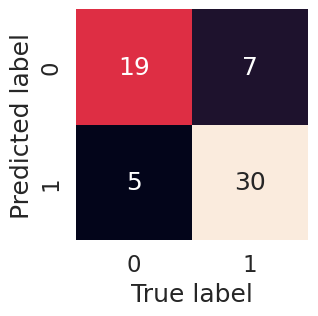

In [33]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_preds)

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.81      0.86      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.79      0.80        61
weighted avg       0.80      0.80      0.80        61

